# Simulation of AuNP Deposition Process: 60nm vs. 22nm

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**!!!Run next cell twice if get warnings at the first time!!!**

In [3]:
#!!!Run this cell twice if get warnings about simparser
from pame.simparser import LayerSimParser #Interface for handling simulation results
import numpy as np

## Parameters for PAME

We simulate the reflection of the fiber covered by AuNPs thru Silanes, so in the simulation, the Stack comprises four layers - Fiber, Silanes, AuNPs, Water:

AuNP model:  **Lemarchand_11.7nm.yaml**;  AuNP diameter: **22nm**; 

Silanes RI based on Sellmeier model:

$$n(\lambda)=\sqrt{1+\frac{A_1\lambda^2}{\lambda^2-B_1^2}+\frac{A_2\lambda^2}{\lambda^2-B_2^2}+\frac{A_3\lambda^2}{\lambda^2-B_3^2}}  $$

Both **Test60nm.mpickle** and **Reproduce22nm.mpickle** were generated in the latest version of PAME. 

1. **Test60nm.mpickle**

Vfrac: **0-0.133, 15 steps**, corresponding disk coverage: **0 - 25.40%**;

sellmeier coefficients: **A1=6.0, A2=3.2, A3=0.89, B1=1.3, B2=0.0, B3=50.0, 2nm**

2. **Reproduce22nm.mpickle**

Vfrac: **0-0.133, 15 steps**, corresponding disk coverage: **0 - 25.40%**;

sellmeier coefficients: **A1=6.0, A2=3.2, A3=0.89, B1=1.3, B2=0.0, B3=50.0, 2nm**



**!!! Loop over selected_material.TotalMix.Vfrac!!!** Not Mix.Vfrac which gives same results in all steps!!!
    

## Import Simulation Results

In [4]:
s1=LayerSimParser.load_pickle('./mpickle_files/Lemarchand60nm_15steps.mpickle')
s2=LayerSimParser.load_pickle('./mpickle_files/Reproduce22nm.mpickle')
#print s1.summary()
#print s2.summary()

In [5]:
print type(s1)
print type(s2)
#about, static, primary, results, inputs

<class 'pame.simparser.LayerSimParser'>
<class 'pame.simparser.LayerSimParser'>


In [6]:
#f=open('s2step0.txt','w')
#print >>f,s2.results.step_0
#f.close()

In [7]:
#s1.primary_panel()['R_avg']

In [8]:
#s2.results.step_0.Layer2.material.mie_full
type(s2.primary)
s2.inputs

{'selected_material.TotalMix.Vfrac': array([ 0.    ,  0.0095,  0.019 ,  0.0285,  0.038 ,  0.0475,  0.057 ,
         0.0665,  0.076 ,  0.0855,  0.095 ,  0.1045,  0.114 ,  0.1235,
         0.133 ])}

In [9]:
#s1.about
#plot(s1.results.step_1.selected_layer.material.mie_full.extinction)
#plot(s1.results.step_1.selected_layer.material.mie_full.scattering)
#plot(s1.results.step_1.selected_layer.material.mie_full.absorbance)

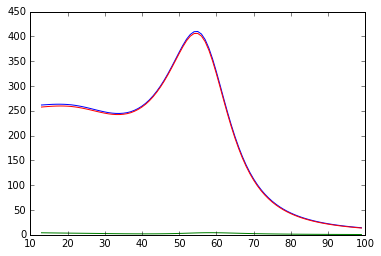

In [10]:
plot(s2.results.step_0.Layer2.material.mie_full.extinction)
plot(s2.results.step_0.Layer2.material.mie_full.scattering)
plot(s2.results.step_0.Layer2.material.mie_full.absorbance)

In [11]:
#s1.promote('selected_layer.material.mie_full.extinction', alias='ext_cross')
#s2.promote('selected_layer.material.mie_full.extinction', alias='ext_cross')
#ax1, ax2 = splot(1,2, figsize=(12,4))
#s1.primary_panel(minor_axis='selected_material.Vfrac',prefix='Vfrac=')['ext_cross'].plot(ax=ax1)
#s2.primary_panel(minor_axis='selected_material.Vfrac',prefix='Vfrac=')['ext_cross'].plot(ax=ax2)
#plt.ylabel('$\sigma$')

/Users/zhaodongmei/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


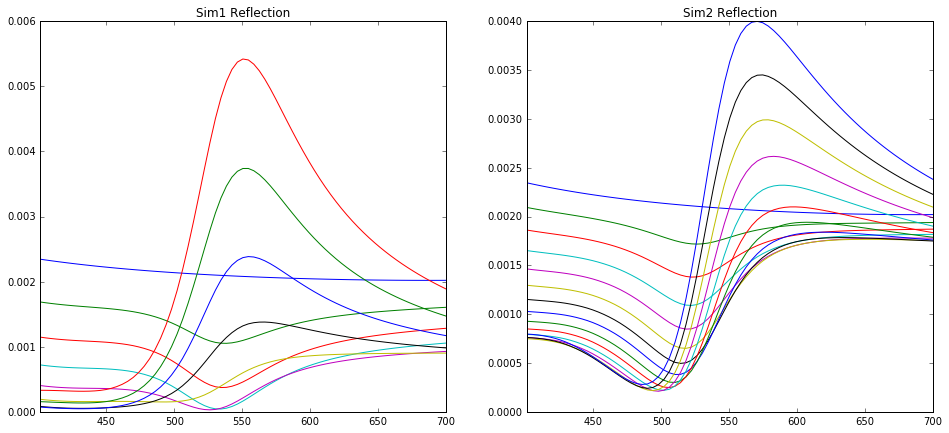

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,7))

ref1=s1.primary_panel()['R_avg'].ix[400:,0:10]
ref1.plot(ax=ax1,title='Sim1 Reflection',legend=False)

ref2=s2.primary_panel()['R_avg'].ix[400:]
ref2.plot(ax=ax2,title='Sim2 Reflection',legend=False)

## Compare Simulation Results with Experimental Resutls

In [13]:
#ts = aunps_glass(style=1).ix[:,::3]
import pandas as pd
spec1 = pd.DataFrame(ref1.values, index=ref1.index, columns=s1.inputs['selected_material.TotalMix.Vfrac'][0:10])
spec1.reference=0
spec2 = pd.DataFrame(ref2.values, index=ref2.index, columns=s2.inputs['selected_material.TotalMix.Vfrac'])
spec2.reference=0

In [14]:
ref1=(spec1.T/spec1.T.iloc[0]).T
ref2=(spec2.T/spec2.T.iloc[0]).T
#spec1.iloc[:,0]

ref1_real = pd.DataFrame(ref1.values.real).astype('float')
abs1= -np.log10(ref1_real)
ref2_real = pd.DataFrame(ref2.values.real).astype('float')
abs2= -np.log10(ref2_real)
#abs1.plot()

Divided by first curve is WRONG for Reflection


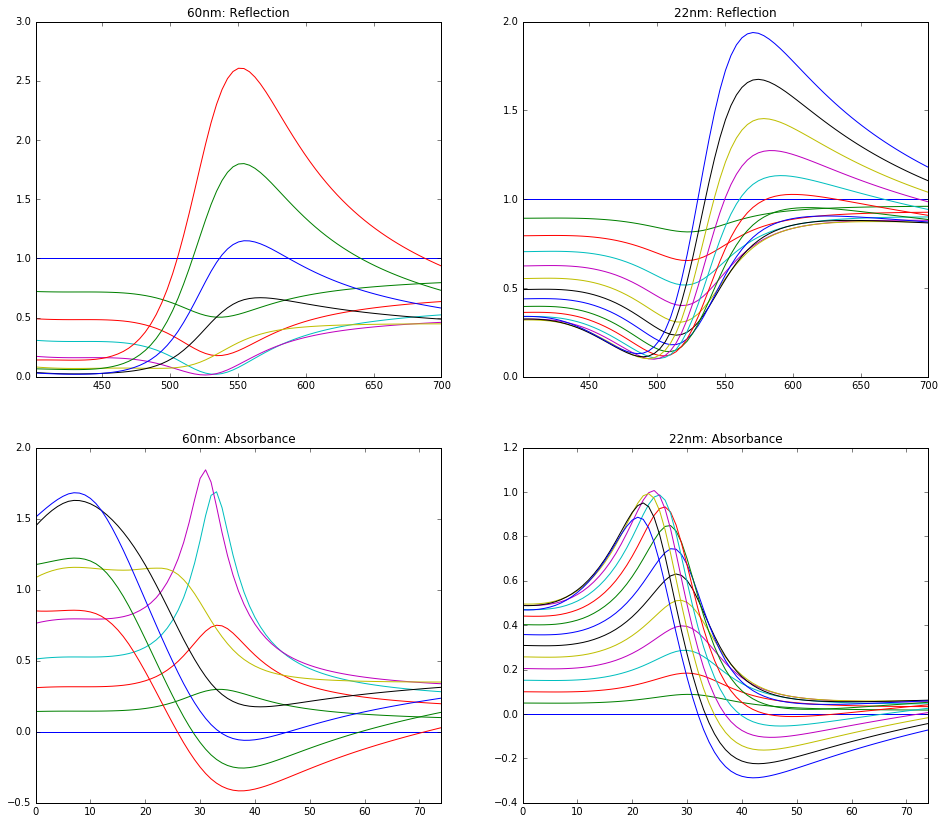

In [15]:
#norm1 = spec1.divide(spec1.iloc[:,0], axis='columns')
#norm2 = spec2/spec2.iloc[0]
fig, ((ax3, ax4),(ax5, ax6)) = plt.subplots(2, 2,figsize=(16,14))
#spec1.plot(ax=ax1,title='Old 22nm results',legend=False)
#spec2.plot(ax=ax2,title='Reproduce 22nm results on 021116',legend=False)
ref1.plot(ax=ax3,title='60nm: Reflection',legend=False)
ref2.plot(ax=ax4,title='22nm: Reflection',legend=False)
abs1.plot(ax=ax5,title='60nm: Absorbance',legend=False)
abs2.plot(ax=ax6,title='22nm: Absorbance',legend=False)
print "Divided by first curve is WRONG for Reflection"